Dataset Name: Heart Disease Dataset

Dataset Link: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset


## **Part A: Conceptual Questions**

**1. What is a Decision Tree and how does it make decisions?**

A Decision Tree is a supervised learning algorithm that makes predictions by splitting data into smaller subsets based on feature conditions.
Each internal node represents a decision rule, branches represent outcomes, and leaf nodes represent final predictions.

**2. What does a split criterion mean in a Decision Tree?**

A split criterion defines how the best feature is chosen at each node.
It measures how well a feature separates the classes.

**3. Difference between Gini Impurity and Entropy**

- Gini Impurity: Measures how often a randomly chosen sample would be
misclassified.

- Entropy: Measures the amount of uncertainty or disorder in the data.

Both aim to create purer nodes. Gini is slightly faster to compute, entropy is more information-theoretic.

**4. Why do Decision Trees tend to overfit?**

Decision Trees tend to overfit because they have the freedom to split data until they perfectly classify every training sample, creating overly complex trees that capture noise and outliers instead of general patterns, leading to poor performance on new, unseen data

**5. What role does the `max_depth` parameter play?**

it controls the maximum number of levels (splits from the root node to a leaf node) the tree is allowed to grow to. This hyperparameter is crucial for managing the complexity of the model and finding the right balance between underfitting and overfitting the data.

## **Part B: Data Exploration**

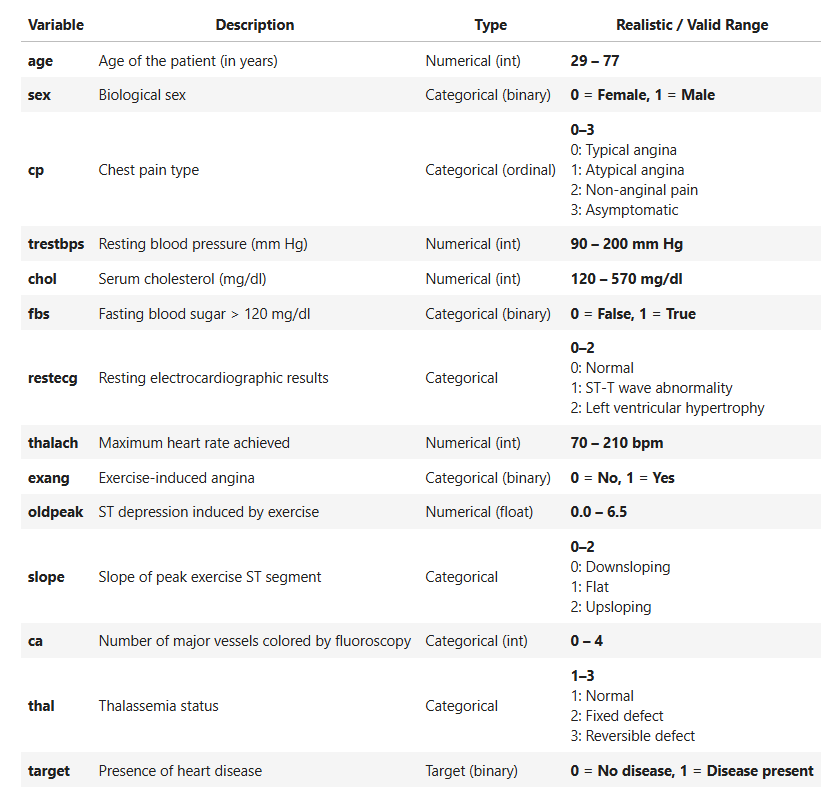

In [2]:
# Load the dataset and display:
import pandas as pd
df = pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
# Shape of the dataset
df.shape


(1025, 14)

In [4]:
# column names
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
# First 5 columns
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
# Identifying Target column & Feature columns
X = df.drop("target", axis=1)
y = df["target"]

In [7]:
# Missing Values
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


No missing values

In [8]:
df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


## **Part C: Data Preprocessing**


In [9]:
X.shape

(1025, 13)

In [10]:
y.shape

(1025,)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((820, 13), (205, 13), (820,), (205,))

## **Part D: Model Building**


In [13]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [14]:
dt = DecisionTreeClassifier(criterion='gini',random_state=42)
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [15]:
dt.score(x_train, y_train)

1.0

In [16]:
y_pred = dt.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0])

## **Part E: Model Evaluation**

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [18]:
accuracy_score(y_test, y_pred)

0.9853658536585366

In [19]:
confusion_matrix(y_test, y_pred)

array([[102,   0],
       [  3, 100]])

In [20]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.97      1.00      0.99       102\n           1       1.00      0.97      0.99       103\n\n    accuracy                           0.99       205\n   macro avg       0.99      0.99      0.99       205\nweighted avg       0.99      0.99      0.99       205\n'

**Which class is predicted better?**

The No Heart Disease (Class 0) is predicted slightly better because it has perfect recall (1.00), meaning no healthy patient is misclassified.

**Is the model overfitting or underfitting?**

The model shows signs of overfitting, as it achieves very high training accuracy and almost perfect test accuracy, indicating it may be learning noise along with patterns.

## **Part F: Understanding Tree Depth (Manual Experiment)**


Training three models by changing only max_depth:


In [21]:
for depth in [2, 5, None]:
    m = DecisionTreeClassifier(max_depth=depth, random_state=42)
    m.fit(x_train, y_train)
    print(depth,
          accuracy_score(y_train, m.predict(x_train)),
          accuracy_score(y_test, m.predict(x_test)))

2 0.7695121951219512 0.6780487804878049
5 0.9292682926829269 0.8439024390243902
None 1.0 0.9853658536585366



1. What happens when the tree is very shallow?

- When the tree is very shallow: It underfits the data and fails to capture
important patterns.

2. What happens when the tree is very deep?

- When the tree is very deep: It overfits by memorizing training data and learning noise.

3. Which model performs best and why?

- Best model: The model with max_depth = 5 performs best because it balances learning and generalization.

In [22]:
import matplotlib.pyplot as plt


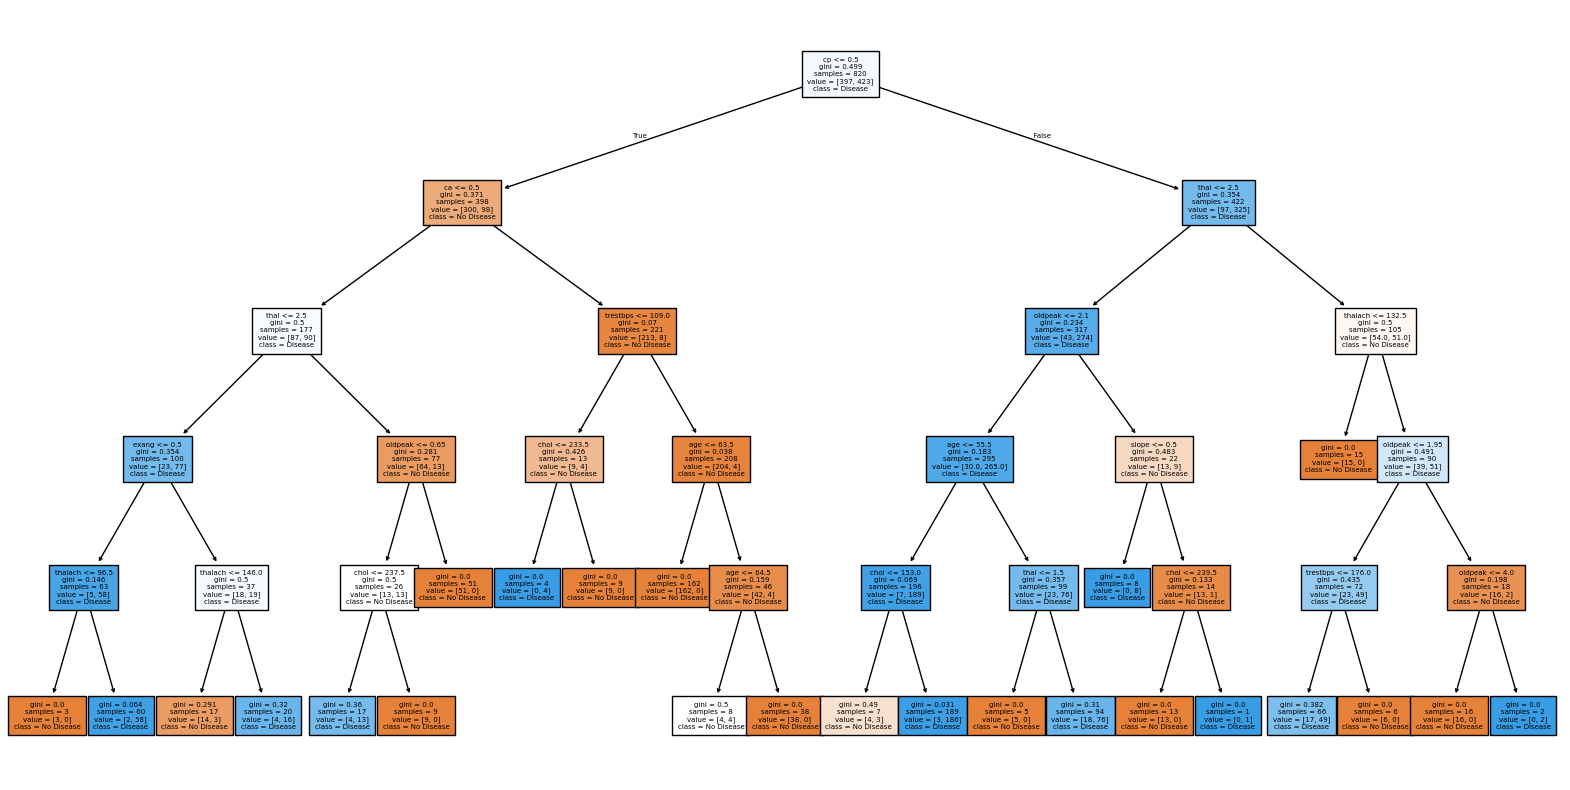

In [23]:
best = DecisionTreeClassifier(max_depth=5, random_state=42)
best.fit(x_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(best, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True, fontsize=5)
plt.show()

**Why are Decision Trees suitable for medical datasets?**

They handle non-linear relationships well and work with mixed medical data while giving clear decision rules that doctors can understand.

**What makes Decision Trees easy to interpret?**

Their rule-based if–else structure and visual tree format make it easy to trace how a decision is made.

**Why are Decision Trees commonly used in ensemble methods?**

They are high-variance models, so combining many trees in ensembles improves accuracy and reduces overfitting.

**Compare criterion='gini' vs criterion='entropy'**

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [25]:
# Gini model
gini_model = DecisionTreeClassifier(criterion="gini",random_state=42)
gini_model.fit(x_train, y_train)
gini_pred = gini_model.predict(x_test)

In [26]:
# Entropy model
entropy_model = DecisionTreeClassifier(criterion="entropy",random_state=42)
entropy_model.fit(x_train, y_train)
entropy_pred = entropy_model.predict(x_test)

In [27]:
# Accuracy comparison
print("Gini Accuracy   :", accuracy_score(y_test, gini_pred))
print("Entropy Accuracy:", accuracy_score(y_test, entropy_pred))

Gini Accuracy   : 0.9853658536585366
Entropy Accuracy: 0.9853658536585366


Both Gini and Entropy give nearly identical accuracy, showing that the split criterion has minimal impact on model performance for this dataset.

**Try min_samples_leaf manually**


In [29]:
# Step 1: Default case (min_samples_leaf = 1)
model_1 = DecisionTreeClassifier(min_samples_leaf=1,random_state=42)
model_1.fit(x_train, y_train)
print("Training Accuracy:",accuracy_score(y_train, model_1.predict(x_train)))
print("Testing Accuracy:",accuracy_score(y_test, model_1.predict(x_test)))


Training Accuracy: 1.0
Testing Accuracy: 0.9853658536585366


In [31]:
# Step 2: Slightly increased (min_samples_leaf = 5)
model_5 = DecisionTreeClassifier(min_samples_leaf=5,random_state=42)
model_5.fit(x_train, y_train)
print("Training Accuracy:",accuracy_score(y_train, model_5.predict(x_train)))
print("Testing Accuracy:",accuracy_score(y_test, model_5.predict(x_test)))


Training Accuracy: 0.9536585365853658
Testing Accuracy: 0.8975609756097561


In [33]:
# Step 3: Medium value (min_samples_leaf = 10)
model_10 = DecisionTreeClassifier(min_samples_leaf=10,random_state=42)
model_10.fit(x_train, y_train)
print("Training Accuracy:",accuracy_score(y_train, model_10.predict(x_train)))
print("Testing Accuracy:",accuracy_score(y_test, model_10.predict(x_test)))

Training Accuracy: 0.9219512195121952
Testing Accuracy: 0.8585365853658536


In [34]:
# Step 4: Large value (min_samples_leaf = 20)
model_20 = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
model_20.fit(x_train, y_train)

print("Training Accuracy:",accuracy_score(y_train, model_20.predict(x_train)))
print("Testing Accuracy:",accuracy_score(y_test, model_20.predict(x_test)))


Training Accuracy: 0.8719512195121951
Testing Accuracy: 0.7951219512195122


Increasing `min_samples_leaf` reduces overfitting by simplifying the tree, but very large values lead to underfitting.

**Conclusion:**
- In this assignment, a Decision Tree classifier was built to predict heart disease using the Heart Disease dataset.
- The dataset was explored, preprocessed, and split into training and testing sets before model training.
- Model performance was evaluated using accuracy, confusion matrix, and classification report.
- Experiments with `max_depth` and `min_samples_leaf` showed that controlling tree complexity improves generalization and reduces overfitting.
- Overall, Decision Trees proved to be an effective and interpretable model for medical prediction tasks.
